In [2]:
import c3aidatalake
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataLineList = c3aidatalake.fetch(
  "linelistrecord",
  {
      "spec" : {
          "filter" : "",
          "limit" : 1000000
      }
  }
)

In [4]:
dataTherapeutic = c3aidatalake.fetch(
    "therapeuticasset",
    {
        "spec" : {
            "filter" : "!contains(clinicalTrialsCovid19, 'NaN')",
            "limit" : 100000
        }
    }
)

In [13]:
dataClinicalTrial = c3aidatalake.fetch(
    "clinicaltrial",
    {
        "spec" : {
            "filter" : "",
            "limit" : 100000
        }
    }
)


In [20]:
for col in dataLineList.columns.tolist():
    print(col)
print(len(dataLineList.columns.tolist()))


locationType
gender
caseConfirmationDate
livesInGroundZero
traveledToGroundZero
relevantTravelHistoryLocation
relevantTravelHistoryDates
notes
outcome
didDie
didRecover
recordSource
lineListSource
hasTravelHistory
id
location.id
age
outcomeDate
symptomStartDate
hospitalAdmissionDate
symptoms
ageRange
groundZeroExposure
chronicDisease
sequenceAvailable
25


In [10]:

symptom_df = dataLineList.copy()
symptom_df["symptoms"] = symptom_df["outcome"].str.split(", ")
symptom_df = symptom_df.explode("symptoms")

symptom_df = symptom_df.dropna(subset = ["outcome"])
symptom_freq = symptom_df.groupby(["symptoms"]).agg("count")[["id"]].sort_values("id")



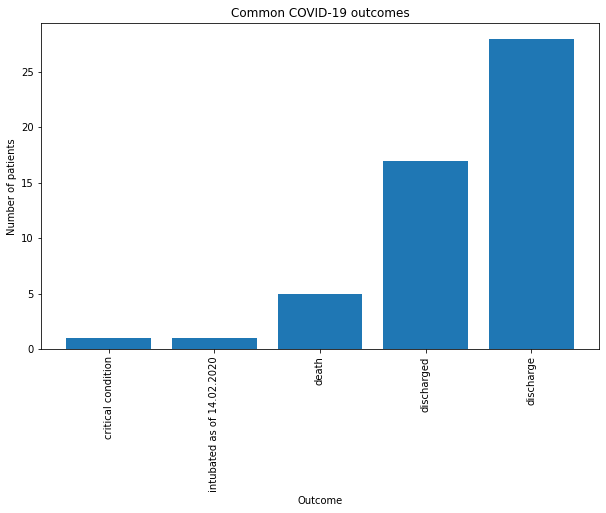

In [12]:
# Plot the data
plt.figure(figsize = (10, 6))
plt.bar(symptom_freq.index, symptom_freq["id"])
plt.xticks(rotation = 90)
plt.xlabel("Outcome")
plt.ylabel("Number of patients")
plt.title("Common COVID-19 outcomes")
plt.show()